In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## Importing models

In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [5]:
dataset = pd.read_csv('./data/StudentsPerformance.csv')
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
x = dataset.drop(['math score'],axis=1) #independent features
y = dataset['math score']


In [11]:
category_fet = [fet for fet in dataset.columns if dataset[fet].dtype == "O"]
for f in category_fet:
    print(f"{f}:{dataset[f].unique()}")

gender:['female' 'male']
race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:['standard' 'free/reduced']
test preparation course:['none' 'completed']


## Encoding and Standardizing 

In [23]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# categorical features
categorical_features = [fet for fet in x.columns if x[fet].dtype == "O"]
# numeric features
num_features = [fet for fet in x.columns if x[fet].dtype != "O"]

cat_transformer = OneHotEncoder()
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,categorical_features),
        ('StanderScalar',num_transformer,num_features)
    ]
)

In [24]:
x = preprocessor.fit_transform(x)

In [26]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [27]:
x.shape

(1000, 19)

## Train Test split

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Model evaluation

In [53]:
def eval_model(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    score = r2_score(y_test,y_pred)
    return mse,mae,score

## Model Traning 

In [54]:
models = {
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "SupportVectorRegressor":SVR(),
    "AdaboostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRFRegressor":XGBRFRegressor(),
    "CatBoostRegressor":CatBoostRegressor()
}

In [108]:
r2_list = [] # for test dataset
for m in list(models):
   model = models[m]
   model.fit(x_train,y_train)
   y_train_pred = model.predict(x_train)
   y_test_pred = model.predict(x_test)

   # for training dataset
   y_train_mse,y_train_mae,y_train_score = eval_model(y_train,y_train_pred)
   # for test dataset
   y_test_mse,y_test_mae,y_test_score = eval_model(y_test,y_test_pred)

   r2_list.append(y_test_score)

   print(f"{m}")
   print("--"*30)
   print("Traing dataset")
   print(f"Mean Squared Error:{y_train_mse}")
   print(f"Mean Absolute Error:{y_train_mae}")
   print(f"R2 score:{y_train_score}")
   print("--"*30)
   print("Test data")
   print(f"Mean Squared Error:{y_test_mse}")
   print(f"Mean Absolute Error:{y_test_mae}")
   print(f"R2 score:{y_test_score}")
   print("=="*30)
   print("\n")


LinearRegression
------------------------------------------------------------
Traing dataset
Mean Squared Error:28.362716217041015
Mean Absolute Error:4.26951171875
R2 score:0.8741936903882622
------------------------------------------------------------
Test data
Mean Squared Error:29.388879013061523
Mean Absolute Error:4.23470703125
R2 score:0.8792262996178921


Lasso
------------------------------------------------------------
Traing dataset
Mean Squared Error:43.47840400585579
Mean Absolute Error:5.206302661246528
R2 score:0.8071462015863456
------------------------------------------------------------
Test data
Mean Squared Error:42.50641683841163
Mean Absolute Error:5.157881810347763
R2 score:0.8253197323627852


Ridge
------------------------------------------------------------
Traing dataset
Mean Squared Error:28.33778823308244
Mean Absolute Error:4.264987823725982
R2 score:0.8743042615212909
------------------------------------------------------------
Test data
Mean Squared Erro

In [109]:
model_list = list(models)

In [110]:
pd.DataFrame(data=list(zip(model_list,r2_list)),columns=['Model name','R2 score']).sort_values(by=['R2 score'],ascending=False )

,Model name,R2 score
2,Ridge,0.880593
0,LinearRegression,0.879226
7,GradientBoostingRegressor,0.872030
8,XGBRFRegressor,0.862867
9,CatBoostRegressor,0.851632
6,AdaboostRegressor,0.845647
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.757683
5,SupportVectorRegressor,0.728600


## Ridge regression 
It is giving the best accuracy

In [111]:
ridge_regression = Ridge()
ridge_regression.fit(x_train,y_train)
predict = ridge_regression.predict(x_test)
accuracy = r2_score(y_test,predict)
print(f"Accuracy:{accuracy}")

Accuracy:0.8805931485028737


## Ploting the Predicted value and actual value 

Text(0, 0.5, 'Predict data')

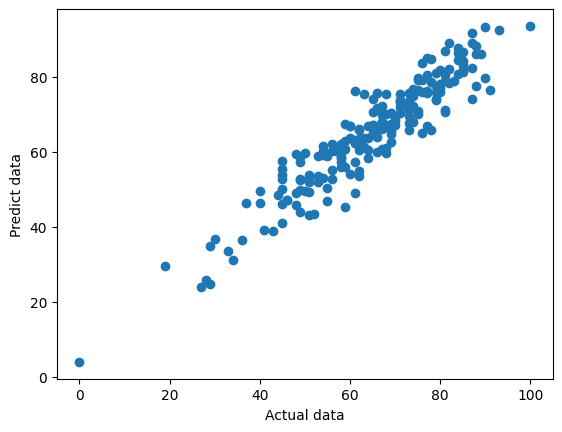

In [112]:
plt.scatter(y_test,predict)
plt.xlabel("Actual data")
plt.ylabel("Predict data")

<Axes: xlabel='math score'>

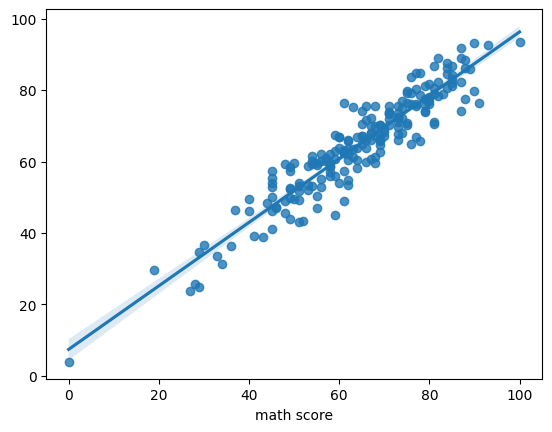

In [113]:
sns.regplot(x=y_test,y=predict)

## Difference between actual data and predicted data

In [115]:
pd.DataFrame({'Actual value':y_test,'Predict value':predict,"Difference":y_test-predict})

,Actual value,Predict value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
